In [1]:
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
from tensorflow import keras

In [3]:
!pip install -U matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 63.8 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.3
    Uninstalling matplotlib-3.6.3:
      Successfully uninstalled matplotlib-3.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
beatrix-jupyterlab 2023.58.190319 requires jupyter-server~=1.16, but you have jupyter-server 2.5.0 which is incompatible.
pymc3 3.11.5 requires numpy<1.22.2,>=1.15.0, but you have numpy 1.23.5 which is incompatible.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.10.1 which is incompatible.
ydata-profiling 4.1.2 requires matplotlib<3.7,>=3.2, but you have matplotlib 3.7.2 which is incompatible.
ydata-profiling 4.1.2 requires scipy<1.10,>=1.4.1, but you have scipy 1.10.1 which is incompatible.


In [4]:
!pip install -U seaborn

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import numpy as np
import pandas as pd
import warnings

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
df=keras.datasets.fashion_mnist

In [9]:
(x_train,y_train),(x_test,y_test)=df.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
y_train.shape

(60000,)

In [12]:
x_test.shape

(10000, 28, 28)

In [13]:
y_test.shape

(10000,)

In [14]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [15]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [16]:
class_names = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]


In [17]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [18]:
from keras import layers

In [19]:
class_names[y_train[0]]

'Ankle boot'

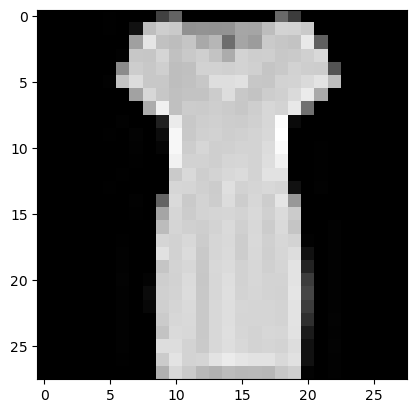

In [20]:
plt.imshow(x_train[20],cmap='gray')

In [21]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(784,activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(512,activation="relu"),
    layers.Dropout(0.35),
    layers.Dense(1024,activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(10,activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 784)               615440    
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                        

In [22]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [23]:
model.compile(
    optimizer="sgd",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

In [24]:
history=model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.5768 - accuracy: 0.7963
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.4584 - accuracy: 0.8345
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.4199 - accuracy: 0.8478
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3987 - accuracy: 0.8567
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3796 - accuracy: 0.8622
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3681 - accuracy: 0.8671
Epoch 7/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3557 - accuracy: 0.8694
Epoch 8/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3480 - accuracy: 0.8738
Epoch 9/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3399 - accuracy: 0.8762
Epoch 10/10
1875/1875 [==============================] - 20s 11m

In [25]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3524 - accuracy: 0.8778


[0.3523677587509155, 0.8777999877929688]

<Axes: >

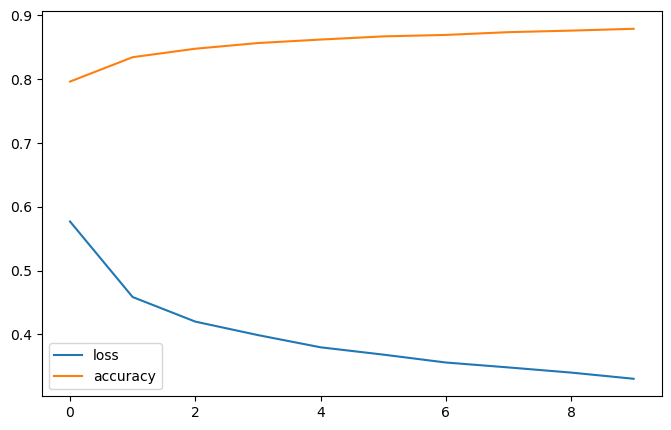

In [26]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [27]:
y_pred=pd.DataFrame(np.argmax(model.predict(x_test),axis=1))

313/313 [==============================] - 1s 4ms/step


In [28]:
y_pred.head(10)

,0
0,9
1,2
2,1
3,1
4,6
5,1
6,4
7,6
8,5
9,7


In [29]:
pd.DataFrame(y_test).head(10)

,0
0,9
1,2
2,1
3,1
4,6
5,1
6,4
7,6
8,5
9,7


In [30]:
pred=np.asarray(y_pred)

In [31]:
pred=pred.flatten()

In [32]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [33]:
from  sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [34]:
class_names = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]


<Axes: >

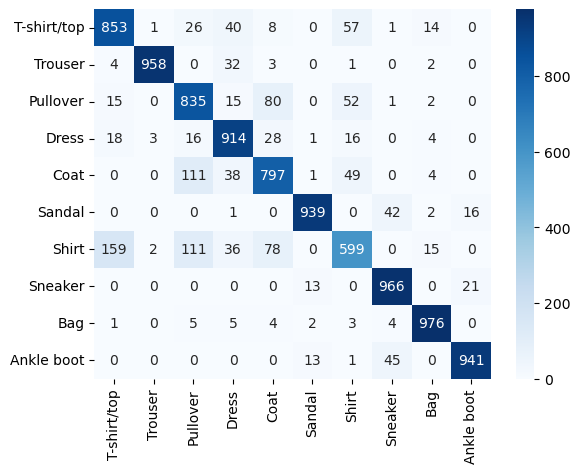

In [35]:
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",xticklabels=class_names,yticklabels=class_names)